<div style="background-color: #f0f0f0; text-align: center; padding: 10px;">
    <h1>Uncovering Insights in the Used Car 🚘 Market: An Exploratory Data Analysis📈</h1>
</div>

<div style="background-color: #CFA3EA; text-align: center; padding: 10px;">
    <h1>1. Introduction</h1>
</div>
<!-- # 1. Introduction -->

## 1.1 Objective

The objective of this project is to perform a comprehensive exploratory data analysis (EDA) on a dataset of used car prices. This analysis aims to uncover actionable insights that can inform buyers, sellers, and businesses within the automotive industry. By examining various attributes such as brand, model year, mileage, fuel type, and price, we seek to understand the factors that influence used car prices. The insights gained from this EDA will also prepare the dataset for subsequent machine learning model training to predict car prices accurately.

## 1.2 Dataset Description



This dataset is provided as part of the [2024 KaggleX Fellowship Program](https://www.kaggle.com/competitions/alx-movie-recommendation-project-2024) skill challenge assessment. We are provided with both train and test data. However, for the purpose of this analysis, we will be using only the train data. Of course, any transformations applied to the train data must similarly be applied to the test data if we intend to use it for training predictive models. The data includes detailed information about used cars, covering various attributes such as:

- **brand**: The manufacturer of the car (e.g., Toyota, Ford).
- **model**: The specific model of the car (e.g., Camry, F-150).
- **model_year**: The year the car model was manufactured.
- **mileage**: The total distance the car has traveled, in miles.
- **fuel_type**: The type of fuel the car uses (e.g., petrol, diesel).
- **engine**: Specifications of the car's engine.
- **transmission**: The type of transmission (e.g., manual, automatic).
- **ext_col**: The exterior color of the car.
- **int_col**: The interior color of the car.
- **accident**: Whether the car has been involved in an accident.
- **clean_title**: Whether the car has a clean title.
- **price**: The selling price of the car.

## 1.3 Import Modules and Data

In [1]:
# Import necessary libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Choose the Set3 palette
palette = sns.color_palette('Set3')

# Set the palette style for Seaborn
sns.set_palette(palette)
sns.set_style('whitegrid')

# Set the color cycle for Matplotlib
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=palette)
# Load the dataset
df = pd.read_csv('/kaggle/input/kagglex-data/train.csv')

<div style="background-color: #CFA3EA; text-align: center; padding: 10px;">
    <h1>2. Initial Data Inspection</h1>
</div>
<!-- # 2. Initial Data Inspection -->

In [2]:
# Display the first few rows of the dataset
print("First few rows of the dataset:\n")
df.head()

First few rows of the dataset:



,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [3]:
# Understanding the basic characteristics of our data
print("\nSummary of data structure and information:\n")
print(df.info())


Summary of data structure and information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB
None


In [4]:
# Check for missing values
print("\nMissing values in the dataset:\n")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows in the dataset:\n")
print(df.duplicated().sum())


Missing values in the dataset:

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

Number of duplicate rows in the dataset:

0


In [5]:
# Get a summary of the dataset
print("\nSummary statistics of the dataset:\n")
df.describe(include='all')


Summary statistics of the dataset:



,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
count,54273.000000,54273,54273,54273.000000,54273.000000,54273,54273,54273,54273,54273,54273,54273,5.427300e+04
unique,NaN,53,1827,NaN,NaN,7,1061,46,260,124,2,1,NaN
top,NaN,BMW,F-150 XLT,NaN,NaN,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,A/T,Black,Black,None reported,Yes,NaN
freq,NaN,7369,780,NaN,NaN,49439,1452,16757,15078,31820,39896,54273,NaN
mean,27136.000000,NaN,NaN,2015.091979,72746.175667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.921844e+04
std,15667.409917,NaN,NaN,5.588909,50469.490448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.282634e+04
min,0.000000,NaN,NaN,1974.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+03
25%,13568.000000,NaN,NaN,2012.000000,32268.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.550000e+04
50%,27136.000000,NaN,NaN,2016.000000,66107.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.800000e+04
75%,40704.000000,NaN,NaN,2019.000000,102000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.500000e+04


## 2.1 Key Insight From Inspection

- **Number of Observations:** 54,273 rows and 13 columns.
- **Missing Values:** None.
- **Duplicate Records:** None.
- **Car Variety:** 53 brands.
- **Model Year Range:** 1974 to 2024.
- **Price Range:** $2,000 to $2,954,083.
- **Average Price:** $39,218.44.

<div style="background-color: #CFA3EA; text-align: center; padding: 10px;">
    <h1>3. Data Cleaning</h1>
</div>
<!-- # 3. Data Cleaning -->

In [6]:
# Get the unique fuel types in the dataset 
df['fuel_type'].unique()

array(['Gasoline', 'Hybrid', 'E85 Flex Fuel', 'Diesel', '–',
       'Plug-In Hybrid', 'not supported'], dtype=object)

Looking at the unique values in fuel_type, looks like one of the values is a dash ('–'). Will investigate further to look at the rows with this particular value.

In [7]:
df[df.eq('–').any(axis=1)]

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
56,56,Ford,F-250 XLT,2019,85000,Diesel,450.0HP 6.7L 8 Cylinder Engine Diesel Fuel,6-Speed A/T,White,–,None reported,Yes,50000
58,58,Mazda,Protege DX,1993,75980,–,–,A/T,Green,Black,None reported,Yes,90200
123,123,Cadillac,RDX Base,2016,68425,Gasoline,279.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,–,None reported,Yes,23500
227,227,Honda,Civic EX,2007,169802,Gasoline,140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,A/T,Red,–,None reported,Yes,5200
236,236,Porsche,Macan Turbo,2016,50000,Gasoline,400.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Gray,–,At least 1 accident or damage reported,Yes,32000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54038,54038,BMW,428 i xDrive SULEV,2016,82975,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Orange,–,None reported,Yes,20500
54076,54076,Chevrolet,1500 Cheyenne,1994,170443,–,–,A/T,Black,Beige,At least 1 accident or damage reported,Yes,7000
54112,54112,Toyota,GR86 Premium,2022,1075,Gasoline,228.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,–,None reported,Yes,29999
54226,54226,Ford,Mustang V6 Premium,2013,69764,Gasoline,305.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,–,None reported,Yes,16000


In [8]:
print('Is dash present in this column?\n')
for col in df.columns:
  print(col, any(df[col] == '–'))

Is dash present in this column?

id False
brand False
model False
model_year False
milage False
fuel_type True
engine True
transmission True
ext_col True
int_col True
accident False
clean_title False
price False


Oops! It appears that other columns (**engine**, **transmission**, **ext_col**, and **int_col**) contain the character '–' as values in their observations. This could indicate missing or unknown values substituted with '–'.

Now, let's determine the number and percentage of these dash values for each column to assess their impact on our entire dataset. 😊

In [9]:
for col in df.columns:
    dash_num = df[col].value_counts().get('–', 0)
    dash_per = (dash_num / len(df[col])) * 100
    print(f"{col}: {dash_num} ({dash_per:.2f}%)")

id: 0 (0.00%)
brand: 0 (0.00%)
model: 0 (0.00%)
model_year: 0 (0.00%)
milage: 0 (0.00%)
fuel_type: 294 (0.54%)
engine: 335 (0.62%)
transmission: 7 (0.01%)
ext_col: 41 (0.08%)
int_col: 1045 (1.93%)
accident: 0 (0.00%)
clean_title: 0 (0.00%)
price: 0 (0.00%)


## 3.1 Handling '–' Values: Imputation Strategy

🔍 **Looking at the percentage above**, we observe that only a small proportion of the data contains the dash value ('–'). Fortunately, there are several imputation strategies we could employ:

1. **Mean and Mode Imputation**: We could replace missing values with the mean (for numerical columns) or the mode (for categorical columns).
2. **Backfill and Forward Fill**: These methods involve propagating the last known value backward (backfill) or forward (forward fill) to fill missing entries.
3. **Predictive Models**: We could use machine learning models to estimate missing values based on other features.

Given that it's only a minuscule portion of our data that is affected, **we'll stick with a simple method: Mode Imputation** (Mode because affected columns are all categorical). I will not be using the general mode for each columns but will consider the mode per brand of car. This approach maintains consistency and minimizes disruption.

Will now proceed with confidence! 🚀

In [10]:
# Funtion for carrying out grouped mode imputation 
def mode_imputation(df, impute_cols, group_by, replace_val):
    grouped_by_brand = df.groupby(group_by)
    
    # Calculate the overall mode for each column to use as fallback
    overall_modes = {col: df[df[col] != replace_val][col].mode().iloc[0] for col in impute_cols}

    for col in impute_cols:
        # Compute mode of each column per brand excluding 'replace_val' from mode calculation
        mode_per_brand = grouped_by_brand[col].apply(lambda x: x[x != replace_val].mode().iloc[0] if not x[x != replace_val].mode().empty else None)
        
        for brand, group in grouped_by_brand:
            if mode_per_brand[brand] is not None:
                mode_val = mode_per_brand[brand]
            else:
                mode_val = overall_modes[col]
                
            df.loc[(df[group_by] == brand) & (df[col] == replace_val), col] = mode_val

    return df

In [11]:
# List coloumns to be imputed
impute_cols = ['fuel_type', 'engine', 'transmission', 'ext_col', 'int_col']
group_by = 'brand'
replace_val = '–'
df = mode_imputation(df, impute_cols, group_by, replace_val)

In [12]:
df[df.eq('–').any(axis=1)]

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price


Voila! All '–' entries in the data has been succesfully replaced. 😊

## 3.2 Features Transformation

In [13]:
# Function to extract transmission type from transmission column
def extract_transmission_features(transmission):
    trans_type = 'Unknown'
    # Normalize transmission string
    transmission = transmission.replace('-', ' ').replace('/', ' ').replace('_', ' ').strip()

    # Determine transmission type
    # Classify transmission types into fours main types
    # Manual, Automatic, dual-clutch and continuous variable transmission
    if 'Variable' in transmission or 'CVT' in transmission:
        trans_type = 'CVT'
    elif 'DCT' in transmission or 'Dual Shift Mode' in transmission or 'At Mt' in transmission:
        trans_type = 'DCT'
    elif 'M T' in transmission or 'Manual' in transmission or 'Mt' in transmission:
        trans_type = 'Manual'
    elif 'A T' in transmission or 'Automatic' or 'Transmission Overdrive Switch' in transmission:
        trans_type = 'Automatic'

    return trans_type

In [14]:
# Funtion to extract hoursepower, displacement and number of cylinders from engine column
def extract_engine_features(engine):
    # Initialize default values
    hp = displacement = cylinders = 'Unknown'

    # Extract horsepower
    hp_match = re.search(r'(\d+\.?\d*)HP', engine)
    if hp_match:
        hp = hp_match.group(1)

    # Extract engine displacement
    displacement_match = re.search(r'(\d+\.?\d*)L', engine)
    if displacement_match:
        displacement = displacement_match.group(1)

    # Extract cylinder count and engine type
    cylinders_match = re.search(r'(\d+) Cylinder Engine', engine)
    if cylinders_match:
        cylinders = cylinders_match.group(1)

    return pd.Series([hp, displacement, cylinders])

In [15]:
# Apply the transformations to the DataFrame
df['transmission'] = df['transmission'].apply(extract_transmission_features)
df[['hp', 'displacement', 'cylinders']] = df['engine'].apply(extract_engine_features)

In [16]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,hp,displacement,cylinders
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Automatic,Blue,Gray,None reported,Yes,11000,375.0,3.5,6
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Manual,Black,Black,None reported,Yes,8250,300.0,3.0,6
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,Automatic,Purple,Beige,None reported,Yes,15000,300.0,4.2,8
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,DCT,Gray,Brown,None reported,Yes,63500,335.0,3.0,6
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,Automatic,White,Black,None reported,Yes,7850,200.0,3.8,6


In [17]:
# Unique values for 'fuel_type'
print("\nUnique fuel types:")
print(df['fuel_type'].unique().tolist())

# Unique values for 'brand'
print("\nUnique car brands:")
print(df['brand'].unique().tolist())

# Unique values for 'transmission'
print("\nUnique transmission types:")
print(df['transmission'].unique().tolist())

# Unique values for 'cylinders'
print("\nUnique cylinder configurations:")
print(df['cylinders'].unique().tolist())


Unique fuel types:
['Gasoline', 'Hybrid', 'E85 Flex Fuel', 'Diesel', 'Plug-In Hybrid', 'not supported']

Unique car brands:
['Ford', 'BMW', 'Jaguar', 'Pontiac', 'Acura', 'Audi', 'GMC', 'Maserati', 'Chevrolet', 'Porsche', 'Mercedes-Benz', 'Tesla', 'Lexus', 'Kia', 'Lincoln', 'Dodge', 'Volkswagen', 'Land', 'Cadillac', 'Mazda', 'RAM', 'Subaru', 'Hyundai', 'MINI', 'Jeep', 'Honda', 'Hummer', 'Nissan', 'Toyota', 'Volvo', 'Genesis', 'Mitsubishi', 'Buick', 'INFINITI', 'McLaren', 'Scion', 'Lamborghini', 'Bentley', 'Suzuki', 'Ferrari', 'Alfa', 'Rolls-Royce', 'Chrysler', 'Aston', 'Rivian', 'Lotus', 'Saturn', 'Lucid', 'Mercury', 'Maybach', 'FIAT', 'Plymouth', 'Bugatti']

Unique transmission types:
['Automatic', 'Manual', 'DCT', 'CVT']

Unique cylinder configurations:
['6', '8', '4', 'Unknown', '5', '12', '10', '3']


As expected, there are 'Unknown' as values in our newly created columns. We will use the mode_imputation function  we created to fill this columns with the brand mode values

In [18]:
df[df.eq('Unknown').any(axis=1)]

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,hp,displacement,cylinders
16,16,Tesla,Model 3 Long Range,2021,21600,Gasoline,271.0HP Electric Motor Electric Fuel System,Automatic,Black,Black,None reported,Yes,138999,271.0,Unknown,Unknown
20,20,GMC,Terrain SLE,2020,61830,Gasoline,1.5L I4 16V GDI DOHC Turbo,Automatic,Summit White,Jet Black,None reported,Yes,26485,Unknown,1.5,Unknown
26,26,Ford,Expedition Max XLT,2021,6449,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,Automatic,Black,Mesa,None reported,Yes,89995,Unknown,3.5,Unknown
37,37,Mazda,CX-30 Premium Package,2020,25779,Gasoline,2.5L I4 16V,Automatic,Platinum Quartz Metallic,Black,At least 1 accident or damage reported,Yes,24995,Unknown,2.5,Unknown
58,58,Mazda,Protege DX,1993,75980,Gasoline,2.5L I4 16V GDI DOHC,Automatic,Green,Black,None reported,Yes,90200,Unknown,2.5,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54210,54210,Kia,Sportage Nightfall,2022,26468,Gasoline,2.4L I4 16V GDI DOHC,Automatic,Red,Black,None reported,Yes,27875,Unknown,2.4,Unknown
54231,54231,Ford,Expedition Max XLT,2021,10232,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,Automatic,Black,Sandstone,None reported,Yes,57850,Unknown,3.5,Unknown
54245,54245,Chrysler,Crossfire Limited,2005,2353,Gasoline,3.2L V6 24V MPFI DOHC,Automatic,Metallic,Black,None reported,Yes,38322,Unknown,3.2,Unknown
54258,54258,RAM,1500 Longhorn,2019,76249,Gasoline,5.7L V8 16V MPFI OHV,Automatic,Diamond Black,Mountain Brown,At least 1 accident or damage reported,Yes,40995,Unknown,5.7,Unknown


In [19]:
# List coloumns to be imputed
impute_cols = ['hp', 'displacement', 'cylinders']
group_by = 'brand'
replace_val = 'Unknown'
df = mode_imputation(df, impute_cols, group_by, replace_val)

In [20]:
df[df.eq('Unknown').any(axis=1)]

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,hp,displacement,cylinders


In [21]:
# Data Type Conversion
# Cast cylinder as object data type, hp and dispacement as numeric columns
df['hp'] = df['hp'].astype('float64')
df['displacement'] = df['displacement'].astype('float64')
df['cylinders'] = df['cylinders'].astype('object')

The `int_col` and `ext_col` columns currently contain a wide range of color values, many of which appear to be variations of the same color in different shades. It's possible that these diverse values are merely buzzwords used for marketing purposes, emphasizing the uniqueness and eccentricity of the colors.

Our goal is to streamline these color values so that our model can better interpret them. By doing so, we'll enhance the clarity and consistency of the data.

🎨 **Action Plan:**

1. **Consolidate Similar Shades:**
   - Identify and group color values that represent the same base color but differ only in intensity or shade.

2. **Standardize Naming:**
   - Use common color names (e.g., "red," "green," "blue") rather than overly specific or ambiguous terms.

3. **Remove Marketing Buzzwords:**
   - Eliminate any extravagant or exaggerated color descriptions that won't contribute to meaningful analysis.

Let's streamline these color values and create a more coherent dataset! 🌈

In [22]:
# Fist let's have a look at the range of colors we have
# Unique Exterior Colors
print("\nUnique Exterior Colors:")
print(df['ext_col'].unique().tolist()[:40])

# Unique Interior Colors
print("\nUnique Interior Colors:")
print(df['int_col'].unique().tolist()[:40])


Unique Exterior Colors:
['Blue', 'Black', 'Purple', 'Gray', 'White', 'Red', 'Silver', 'Summit White', 'Platinum Quartz Metallic', 'Green', 'Orange', 'Lunar Rock', 'Red Quartz Tintcoat', 'Beige', 'Gold', 'Jet Black Mica', 'Delmonico Red Pearlcoat', 'Brown', 'Rich Garnet Metallic', 'Stellar Black Metallic', 'Yellow', 'Deep Black Pearl Effect', 'Metallic', 'Ice Silver Metallic', 'Agate Black Metallic', 'Rosso Mars Metallic', 'White Clearcoat', 'Santorini Black Metallic', 'DB Black Clearcoat', 'Snowflake White Pearl', 'Glacial White Pearl', 'Maximum Steel Metallic', 'Blue Caelum', 'Dark Matter Metallic', 'Oxford White', 'Cobra Beige Metallic', 'Velvet Red Pearlcoat', 'Python Green', 'Obsidian Black Metallic', 'Beluga Black']

Unique Interior Colors:
['Gray', 'Black', 'Beige', 'Brown', 'Silver', 'Jet Black', 'Mesa', 'White', 'Red', 'Blue', 'Medium Stone', 'Ash', 'Ebony', 'Shara Beige', 'Tan', 'Titan Black / Quarzit', 'Global Black', 'Orange', 'Saddle Brown', 'Nero Ade', 'Beluga', 'Light Sl

The unique color values extracted from the `int_col` and `ext_col` columns are quite extensive and diverse and that is only 40 of it seen above.
#### The Challenge:
- **Color Overload 😪**: The sheer number of distinct color names overwhelms the analysis process. It's like standing in a vast paint store with endless color swatches, each slightly different from the next.
- **Buzzwords**: Some entries sound extravagant or overly specific (e.g., "Hotspur Hide," "Kyalami Orange"). These buzzwords might be more about marketing appeal than practical data.

#### The Problem:
- **Inconsistency**: Similar shades of the same color are represented in various ways (e.g., "Gray," "Grey," "Slate Gray," "Light Gray," "Dark Gray," "Charcoal," etc.). This inconsistency hinders meaningful comparisons.
- **Redundancy**: Multiple variations of the same color (e.g., "Black," "Jet Black," "Obsidian Black") add redundancy without adding significant information.

#### The Solution 😊:
- **Standardization Needed**: To make sense of this colorful chaos, we must standardize color names. I will write a function to try and achive something more streamlined.

🎨 Let's harmonize these colors and create a more coherent dataset! 🌈

In [23]:
# Function to generalize colors
def generalize_color(color):
    if any(keyword in color for keyword in ['Blue', 'Blu', 'Navy', 'Slate', 'Sapphire', 'Indigo', 'Sea', 'Tempest']):
        return 'Blue'
    elif any(keyword in color for keyword in ['Green', 'Emerald', 'Gecko', 'Parchment', 'Verde', 'Cypress']):
        return 'Green'
    elif any(keyword in color for keyword in ['Black', 'Blk', 'BLACK', 'Nero', 'Charcoal', 'Dark Matter', 'Noir', 'Ebony', 'Obsidian']):
        return 'Black'
    elif any(keyword in color for keyword in ['Gray', 'Grey', 'Graystone', 'Anthracite', 'Ash', 'Pewter', 'Portland', 'Beluga', 'Cloud', 'Granite', 'Graphite', 'Shale', 'Oyster', 'Galvanized', 'Titanium']):
        return 'Gray'
    elif any(keyword in color for keyword in ['White', 'Snow', 'Diamond', 'Pearl', 'Ice', 'Chalk', 'Yulong', 'Bianco']):
        return 'White'
    elif any(keyword in color for keyword in ['Red', 'Crimson', 'Boulder', 'Infrared', 'Mesa', 'Garnet', 'Rosso', 'Ruby', 'Burgundy', 'Maroon', 'Brandy']):
        return 'Red'
    elif any(keyword in color for keyword in ['Silver', 'Platinum', 'Steel']):
        return 'Silver'
    elif any(keyword in color for keyword in ['Orange', 'Tangerine', 'Mango', 'Auburn']):
        return 'Orange'
    elif any(keyword in color for keyword in ['Yellow', 'Gold', 'Tupelo']):
        return 'Yellow'
    elif any(keyword in color for keyword in ['Purple', 'Violet', 'Lavender']):
        return 'Purple'
    elif any(keyword in color for keyword in ['Brown', 'Bronze', 'Chestnut', 'Walnut', 'Amber', 'Sandstone', 'Mocha', 'Caramel', 'Camel', 'Cocoa', 'Espresso', 'Cappuccino']):
        return 'Brown'
    elif any(keyword in color for keyword in ['Beige', 'Tan', 'Cream', 'Cashmere']):
        return 'Beige'
    elif any(keyword in color for keyword in ['Pink', 'Rose']):
        return 'Pink'
    elif any(keyword in color for keyword in ['Magenta']):
        return 'Magenta'
    elif any(keyword in color for keyword in ['Metallic']):
        return 'Metallic'

    return color  # Return the original color if no pattern matches

In [24]:
# Apply the function
for col in ['ext_col', 'int_col']:
    df[col] = df[col].apply(generalize_color)

In [25]:
df['ext_col'].unique()

array(['Blue', 'Black', 'Purple', 'Gray', 'White', 'Red', 'Silver',
       'Green', 'Orange', 'Lunar Rock', 'Beige', 'Yellow', 'Brown',
       'Metallic', 'Hellayella Clearcoat', 'Designo Magno Matte', 'Onyx',
       'Dark Moss', 'C / C', 'Glacier', 'Nightfall Mica', 'Caviar',
       'Pink', 'Custom Color'], dtype=object)

In [26]:
df['int_col'].unique()

array(['Gray', 'Black', 'Beige', 'Brown', 'Silver', 'Red', 'White',
       'Blue', 'Medium Stone', 'Orange', 'Yellow', 'Hotspur Hide',
       'Green', 'Hotspur', 'Ceramic', 'Macchiato', 'Sport', 'Linen'],
      dtype=object)

In [27]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,hp,displacement,cylinders
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Automatic,Blue,Gray,None reported,Yes,11000,375.0,3.5,6
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Manual,Black,Black,None reported,Yes,8250,300.0,3.0,6
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,Automatic,Purple,Beige,None reported,Yes,15000,300.0,4.2,8
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,DCT,Gray,Brown,None reported,Yes,63500,335.0,3.0,6
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,Automatic,White,Black,None reported,Yes,7850,200.0,3.8,6


## 3.3 Droping Unnecessary Columns

We need to drop some columns that will not be beneficial to our analysis. These columns include: id, engine and clean_title. clean_title column just has 'Yes' all throught the entire dataset so wont provide any insight.

In [28]:
# Drop the columns 'id', 'engine', and 'clean_title'
df.drop(columns=['id', 'engine', 'clean_title'], inplace=True)
df.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,price,hp,displacement,cylinders
0,Ford,F-150 Lariat,2018,74349,Gasoline,Automatic,Blue,Gray,None reported,11000,375.0,3.5,6
1,BMW,335 i,2007,80000,Gasoline,Manual,Black,Black,None reported,8250,300.0,3.0,6
2,Jaguar,XF Luxury,2009,91491,Gasoline,Automatic,Purple,Beige,None reported,15000,300.0,4.2,8
3,BMW,X7 xDrive40i,2022,2437,Hybrid,DCT,Gray,Brown,None reported,63500,335.0,3.0,6
4,Pontiac,Firebird Base,2001,111000,Gasoline,Automatic,White,Black,None reported,7850,200.0,3.8,6


<div style="background-color: #CFA3EA; text-align: center; padding: 10px;">
    <h1>4. Exploratory Data Analysis (EDA)</h1>
</div>
<!-- # 4. Exploratory Data Analysis (EDA) -->

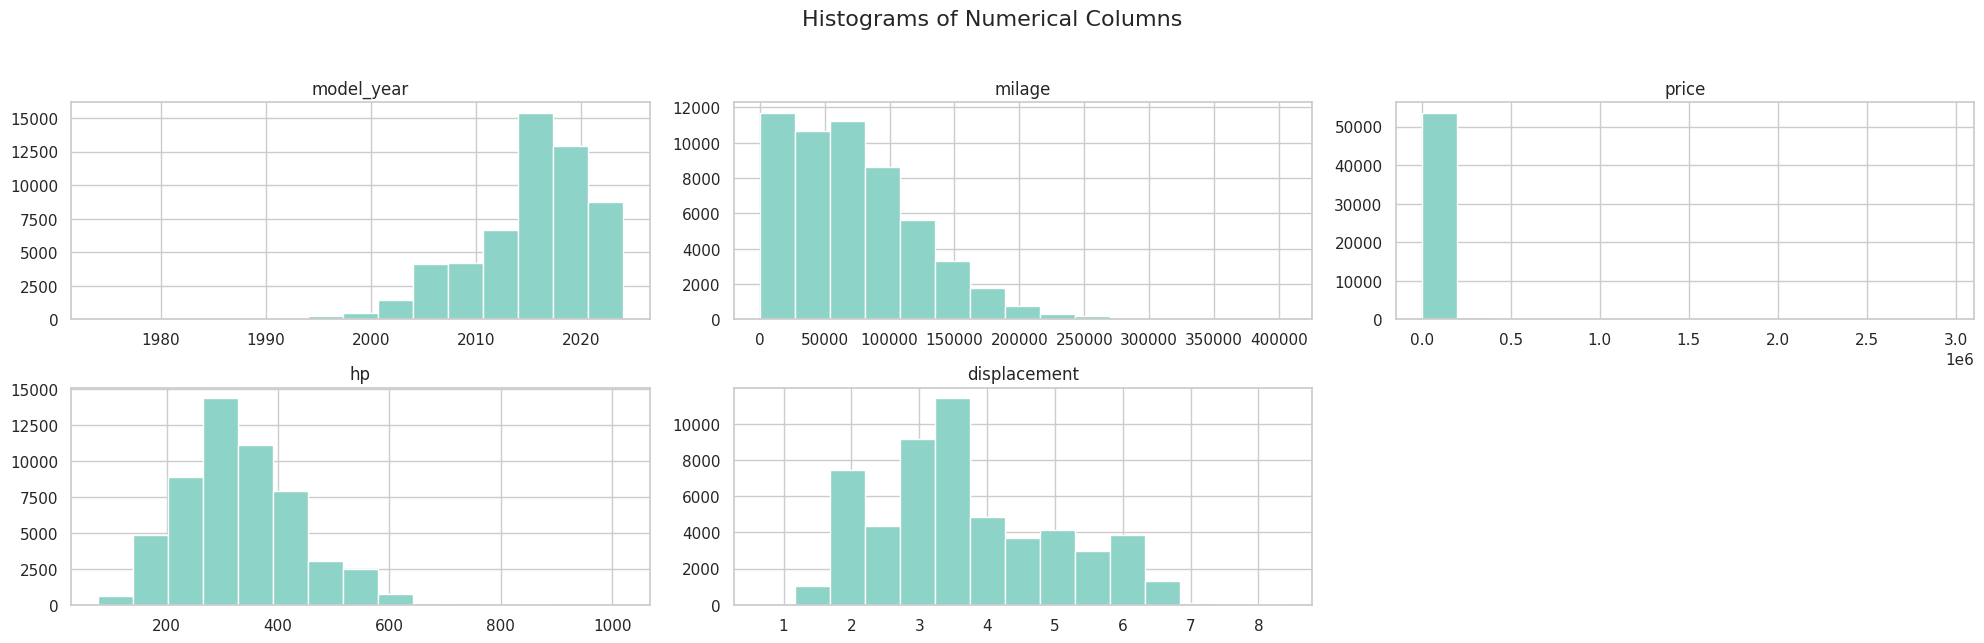

In [29]:
# Univariate Analysis
# Set plot style
sns.set(style="whitegrid")
## Numerical Columns
def plot_histograms(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numeric_cols].hist(bins=15, figsize=(20, 15), layout=(5, 3), color=palette[0])
    plt.suptitle('Histograms of Numerical Columns', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

plot_histograms(df)

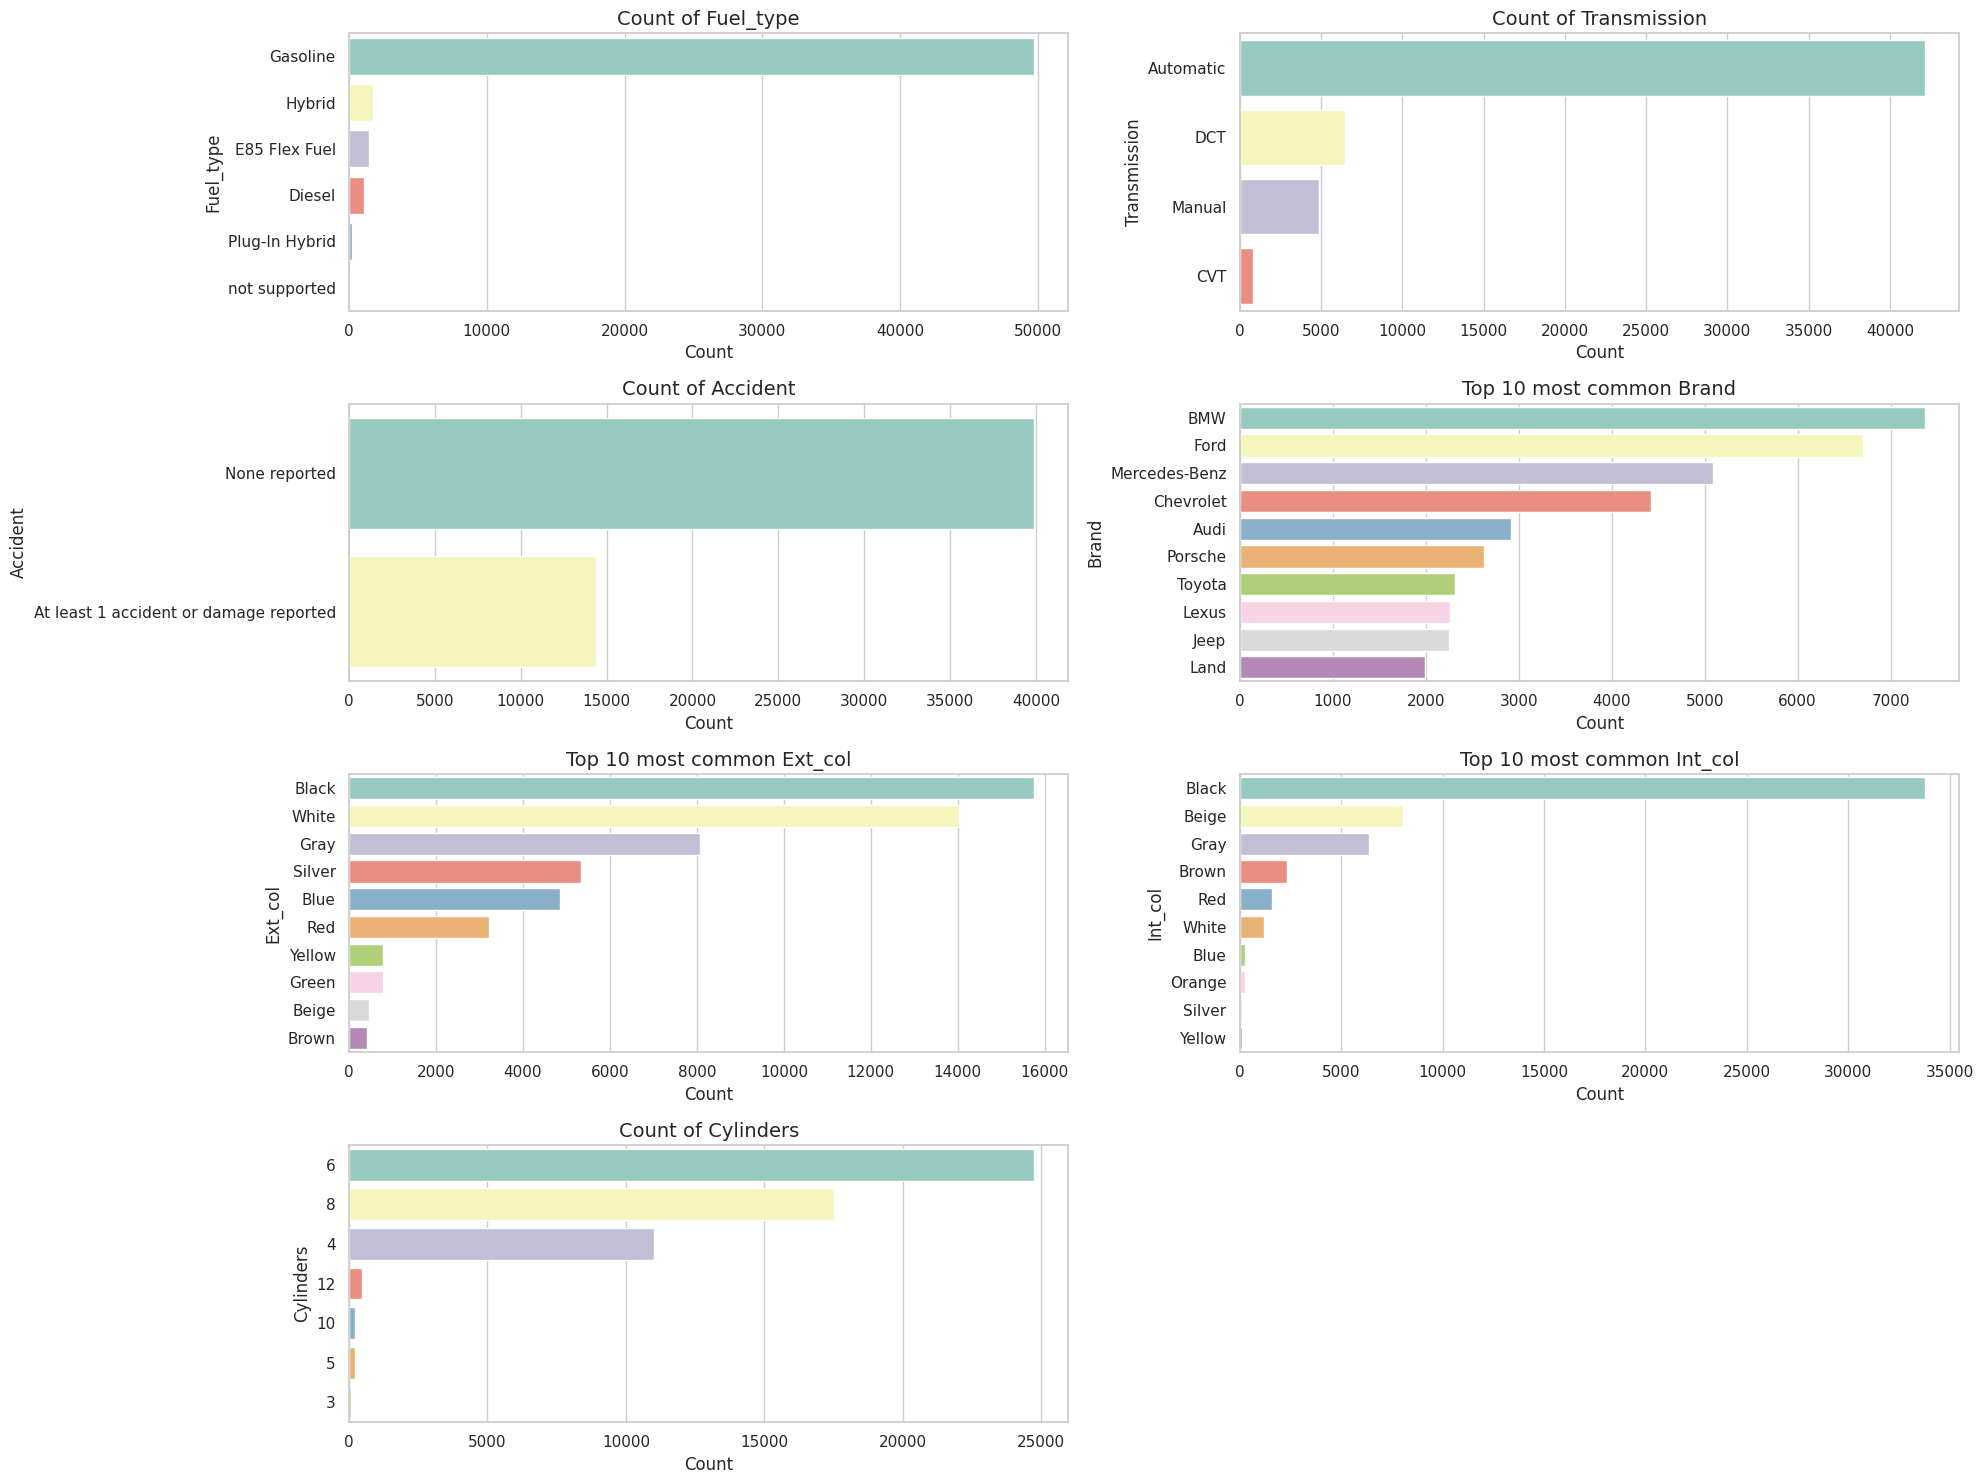

In [30]:
## Categorical Columns
def plot_categorical_counts(df):
    categorical_cols = ['fuel_type', 'transmission', 'accident', 'brand', 'ext_col', 'int_col', 'cylinders']
    fig, axes = plt.subplots(4, 2, figsize=(20, 15))

    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        top_10 = df[col].value_counts().nlargest(10).index
        df_filtered = df[df[col].isin(top_10)]
        sns.countplot(y=col, data=df_filtered, palette=palette, ax=axes[i], order=top_10)
        axes[i].set_xlabel('Count')
        axes[i].set_ylabel(col.capitalize())
        if col in ['fuel_type', 'transmission', 'accident', 'cylinders']:
            axes[i].set_title(f'Count of {col.capitalize()}', fontsize=14)
        else:
            axes[i].set_title(f'Top 10 most common {col.capitalize()}', fontsize=14)

    # Turn off the last axis if not needed
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_categorical_counts(df)

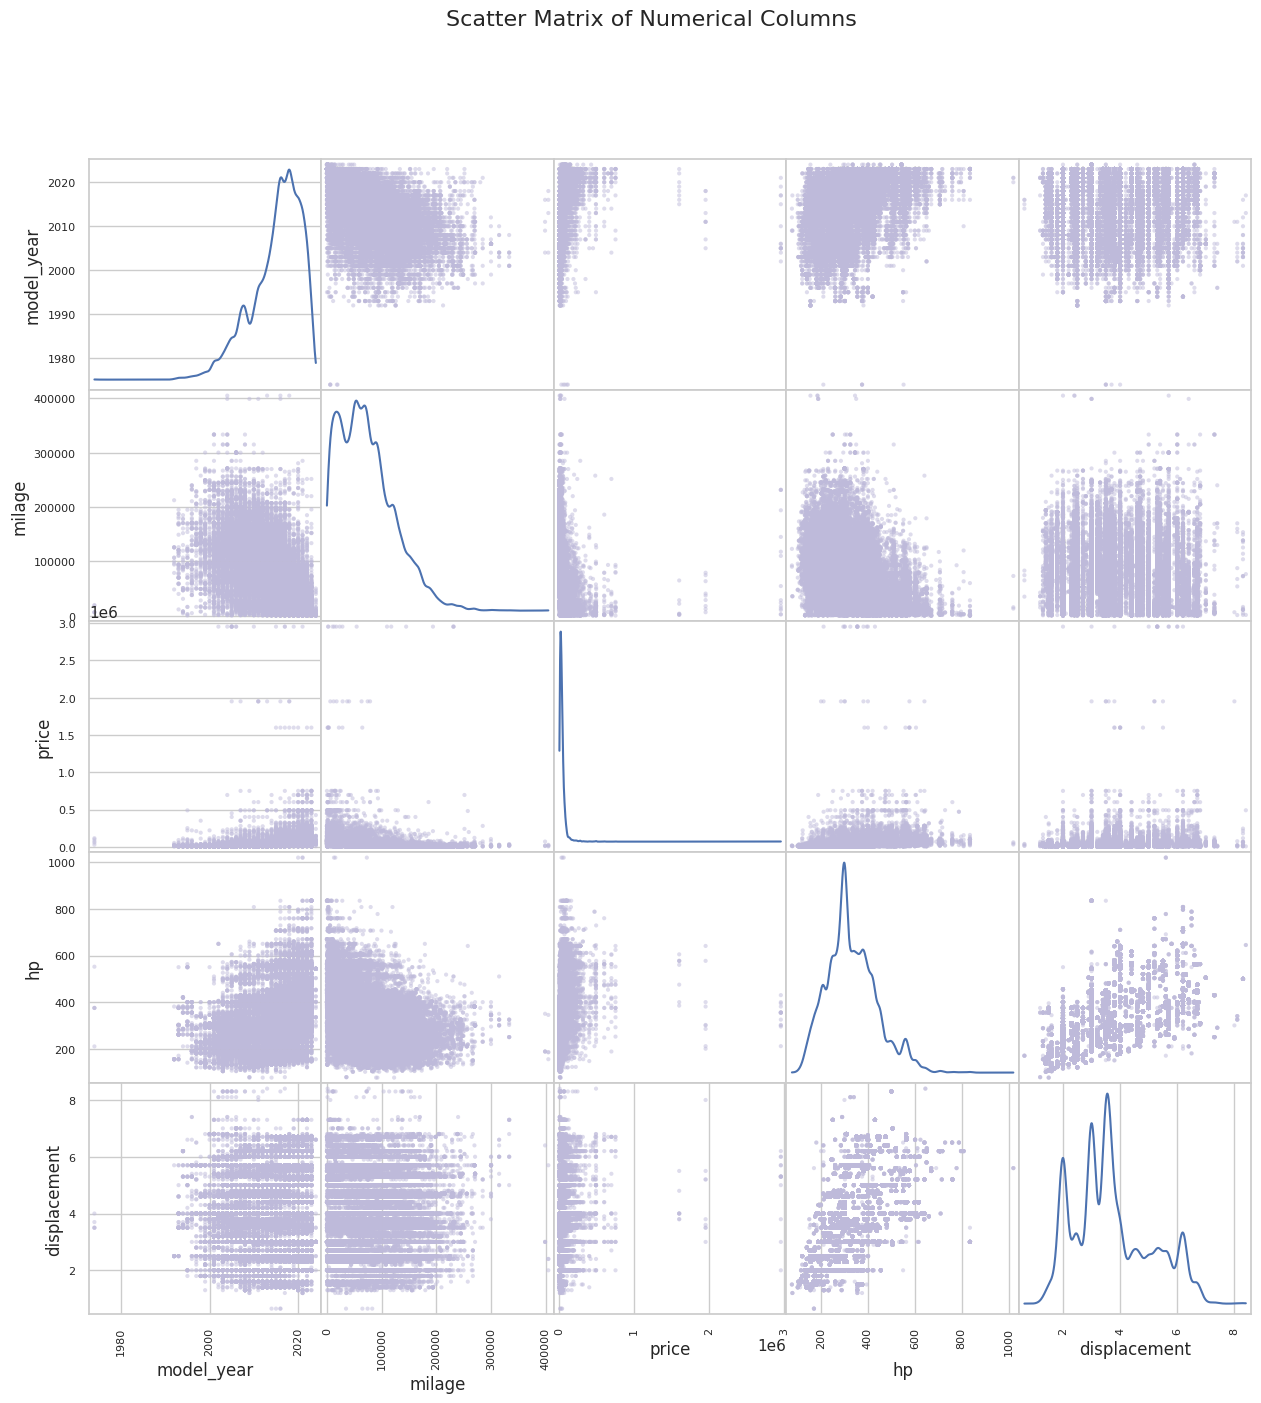

In [31]:
# Numerical Columns

def plot_scatter_matrix(df):
    # Selecting numerical columns
    numerical_df = df.select_dtypes(include=['float64','int64'])
    scatter_matrix(numerical_df, alpha=0.5, figsize=(15, 15), diagonal='kde', color=palette[2])
    plt.suptitle('Scatter Matrix of Numerical Columns', fontsize=16)
    plt.show()

plot_scatter_matrix(df)


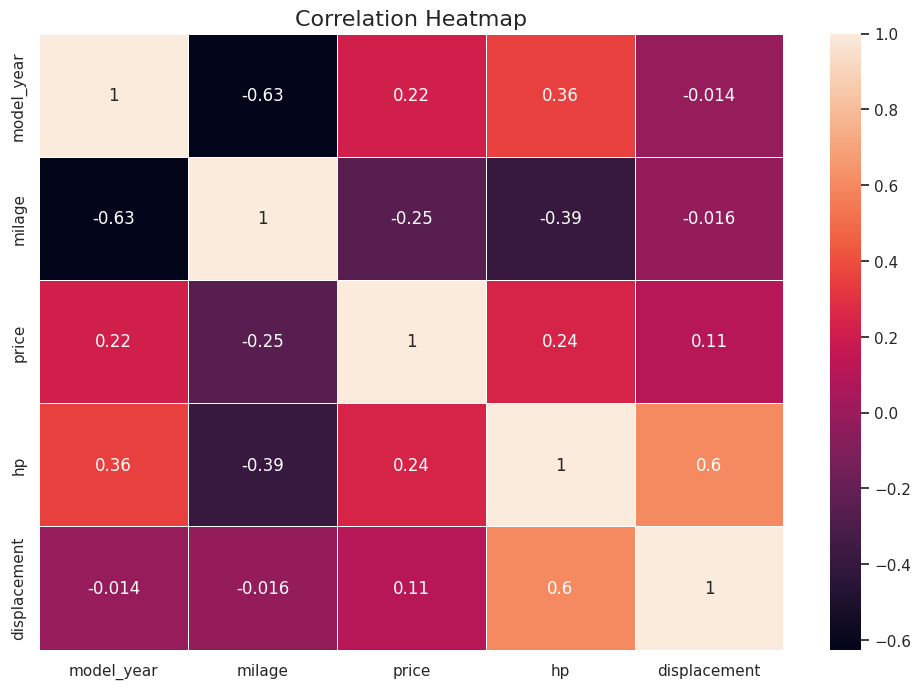

In [32]:
## Correlation Heatmap
def plot_correlation_heatmap(df):
    corr = df.select_dtypes(include=['float64', 'int64']).corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, linewidths=0.5)
    plt.title('Correlation Heatmap', fontsize=16)
    plt.show()

plot_correlation_heatmap(df)

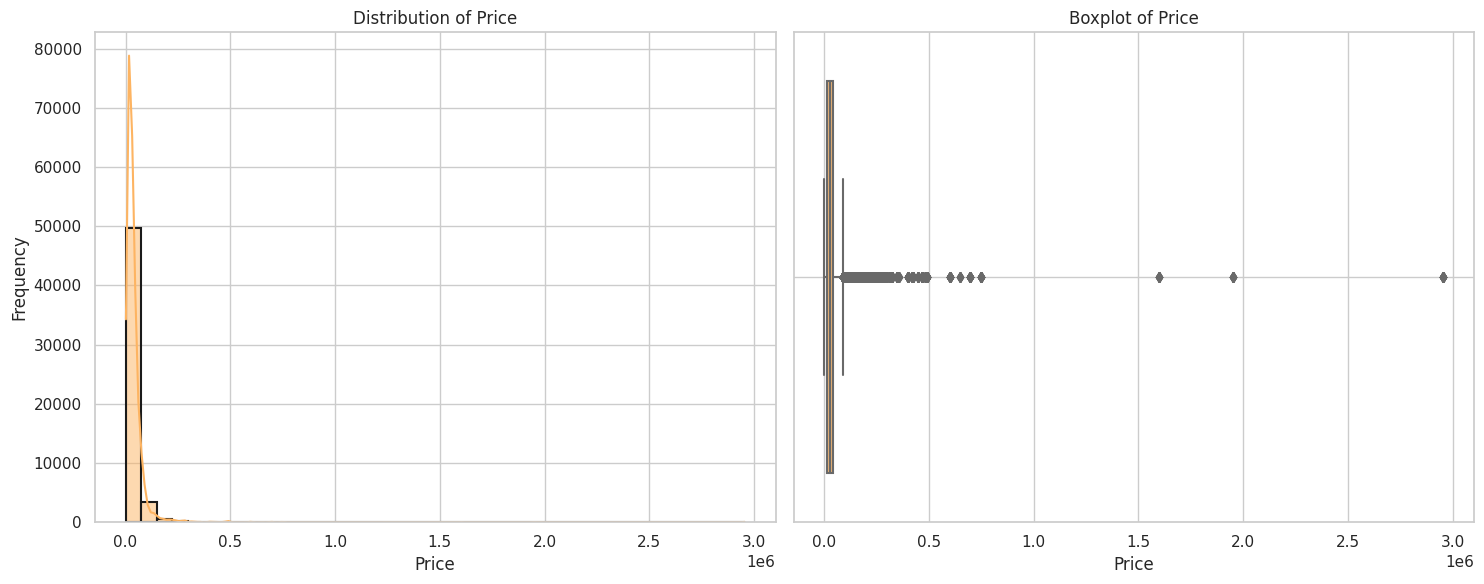

In [33]:
# Car Price Analysis

def plot_price_distribution(df):
    # Suppress specific FutureWarning
    with warnings.catch_warnings():
        warnings.simplefilter(action='ignore', category=FutureWarning)

        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        # Plotting Histogram with KDE
        sns.histplot(df['price'], bins=40, kde=True, ax=axes[0], color=palette[5], edgecolor='k', linewidth=1.5)
        axes[0].set_title('Distribution of Price')
        axes[0].set_xlabel('Price')
        axes[0].set_ylabel('Frequency')
        axes[0].grid(True)

        # Plotting Boxplot
        sns.boxplot(x=df['price'], color=palette[5], ax=axes[1])
        axes[1].set_title('Boxplot of Price')
        axes[1].set_xlabel('Price')
        axes[1].grid(True)

        plt.tight_layout()
        plt.show()

# View distribution of the entire price column
plot_price_distribution(df)

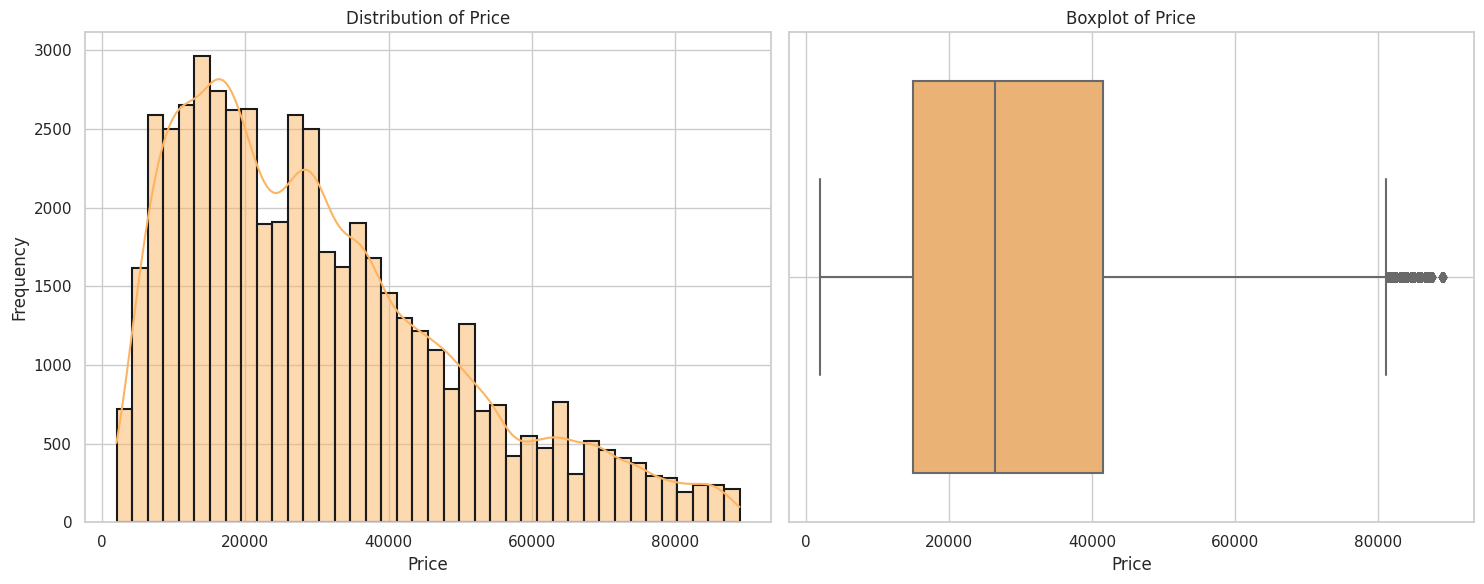

In [34]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
trimmed_df = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]

# View distribution of the price column without extreme values
plot_price_distribution(trimmed_df)

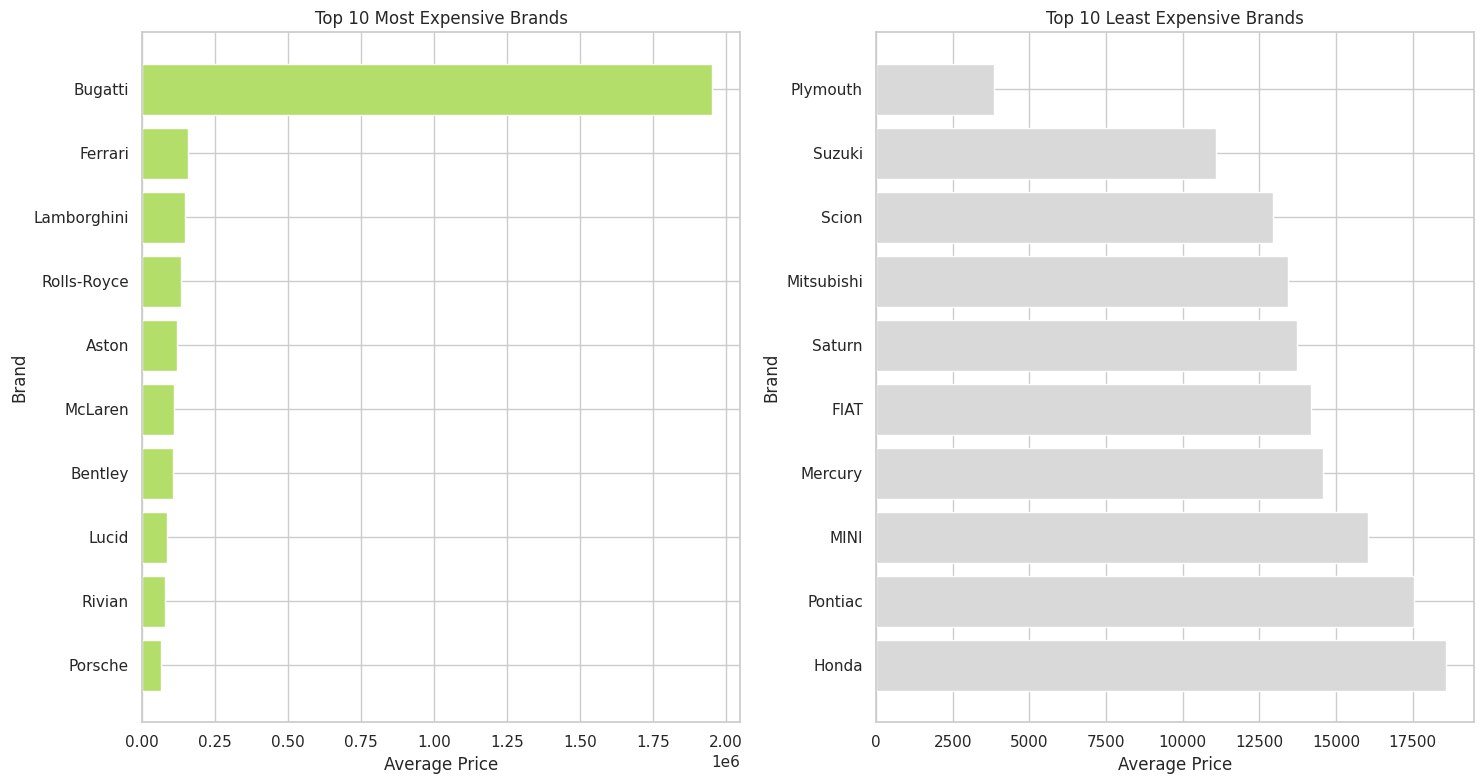

In [35]:
# Determine the most and least expensive brand by
# plotting the Average price against brand 
def plot_top_and_bottom_avg_price_brands(df):
    # Calculate average price per brand
    avg_price_per_brand = df.groupby('brand')['price'].mean().sort_values()

    # Select top 10 brands with highest average price
    top_10_brands_high = avg_price_per_brand.tail(10)

    # Select top 10 brands with lowest average price
    top_10_brands_low = avg_price_per_brand.head(10)

    # Plotting horizontal bar plots side by side
    fig, axes = plt.subplots(1, 2, figsize=(15, 8))

    # Top 10 highest average price
    axes[0].barh(top_10_brands_high.index, top_10_brands_high.values, color=palette[6])
    axes[0].set_xlabel('Average Price')
    axes[0].set_ylabel('Brand')
    axes[0].set_title('Top 10 Most Expensive Brands')
    axes[0].grid(True)

    # Top 10 lowest average price
    axes[1].barh(top_10_brands_low.index, top_10_brands_low.values, color=palette[8])
    axes[1].set_xlabel('Average Price')
    axes[1].set_ylabel('Brand')
    axes[1].set_title('Top 10 Least Expensive Brands')
    axes[1].invert_yaxis()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

plot_top_and_bottom_avg_price_brands(df)

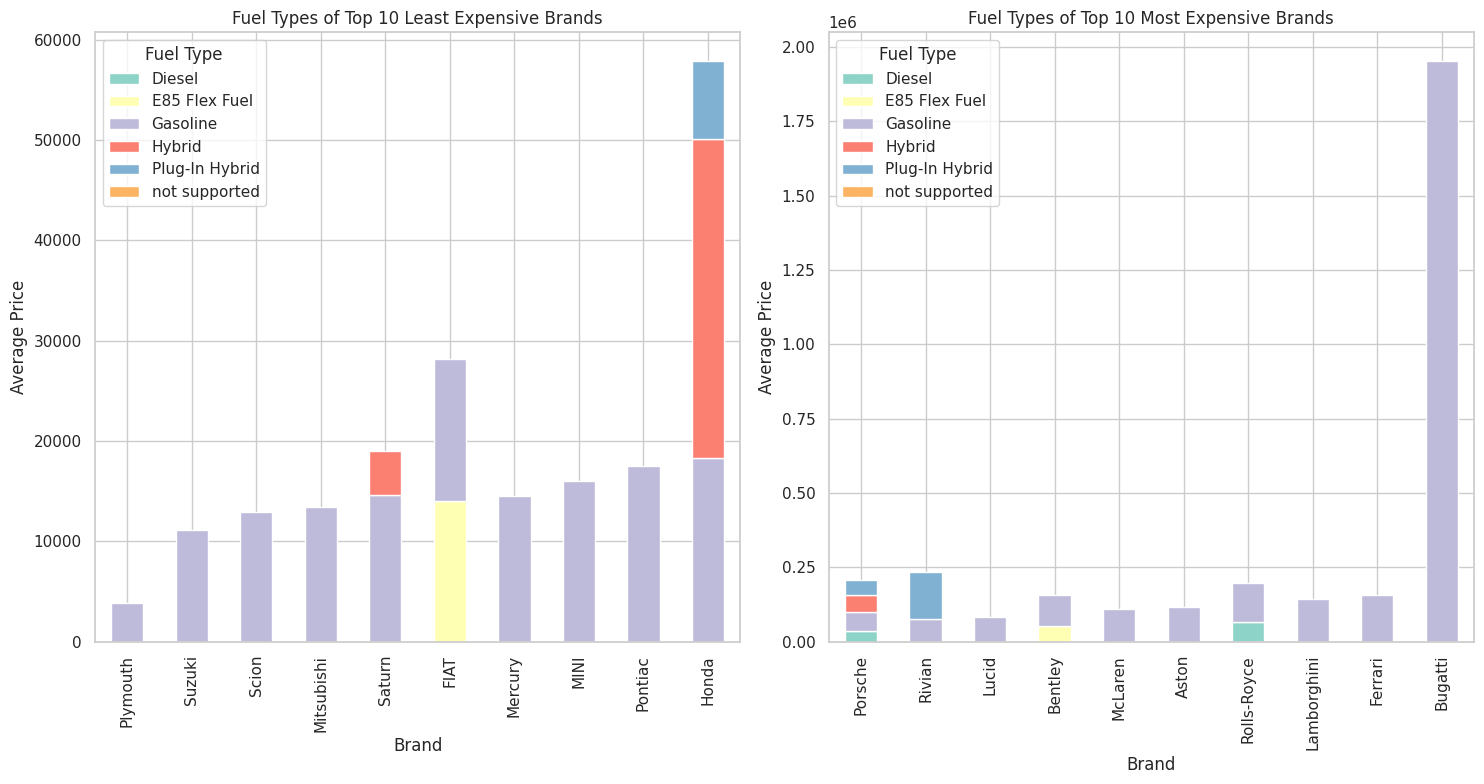

In [36]:
def plot_avg_price_brands_with_fuel_types(df):
    # Calculate average price per brand and fuel type
    avg_price_per_brand_fuel = df.groupby(['brand', 'fuel_type'])['price'].mean().unstack()
    avg_price_per_brand = df.groupby('brand')['price'].mean().sort_values()

    # Select top 10 brands with highest average price
    brands_high = avg_price_per_brand[-10:].index.tolist()
    top_10_brands_high = avg_price_per_brand_fuel.loc[brands_high]

    # Select top 10 brands with lowest average price
    brands_low = avg_price_per_brand[:10].index.tolist()
    top_10_brands_low = avg_price_per_brand_fuel.loc[brands_low]

    # Plotting horizontal stacked bar plots side by side
    fig, axes = plt.subplots(1, 2, figsize=(15, 8))
    
    # Top 10 lowest average price
    top_10_brands_low.plot(kind='bar', stacked=True, ax=axes[0], color=palette)
    axes[0].set_xlabel('Brand')
    axes[0].set_ylabel('Average Price')
    axes[0].set_title('Fuel Types of Top 10 Least Expensive Brands')
    axes[0].legend(title='Fuel Type', loc='upper left')  # Add legend
    
    # Top 10 highest average price
    top_10_brands_high.plot(kind='bar', stacked=True, ax=axes[1], color=palette)
    axes[1].set_xlabel('Brand')
    axes[1].set_ylabel('Average Price')
    axes[1].set_title('Fuel Types of Top 10 Most Expensive Brands')
    axes[1].legend(title='Fuel Type', loc='upper left')  # Add legend

    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame 'df'
plot_avg_price_brands_with_fuel_types(df)

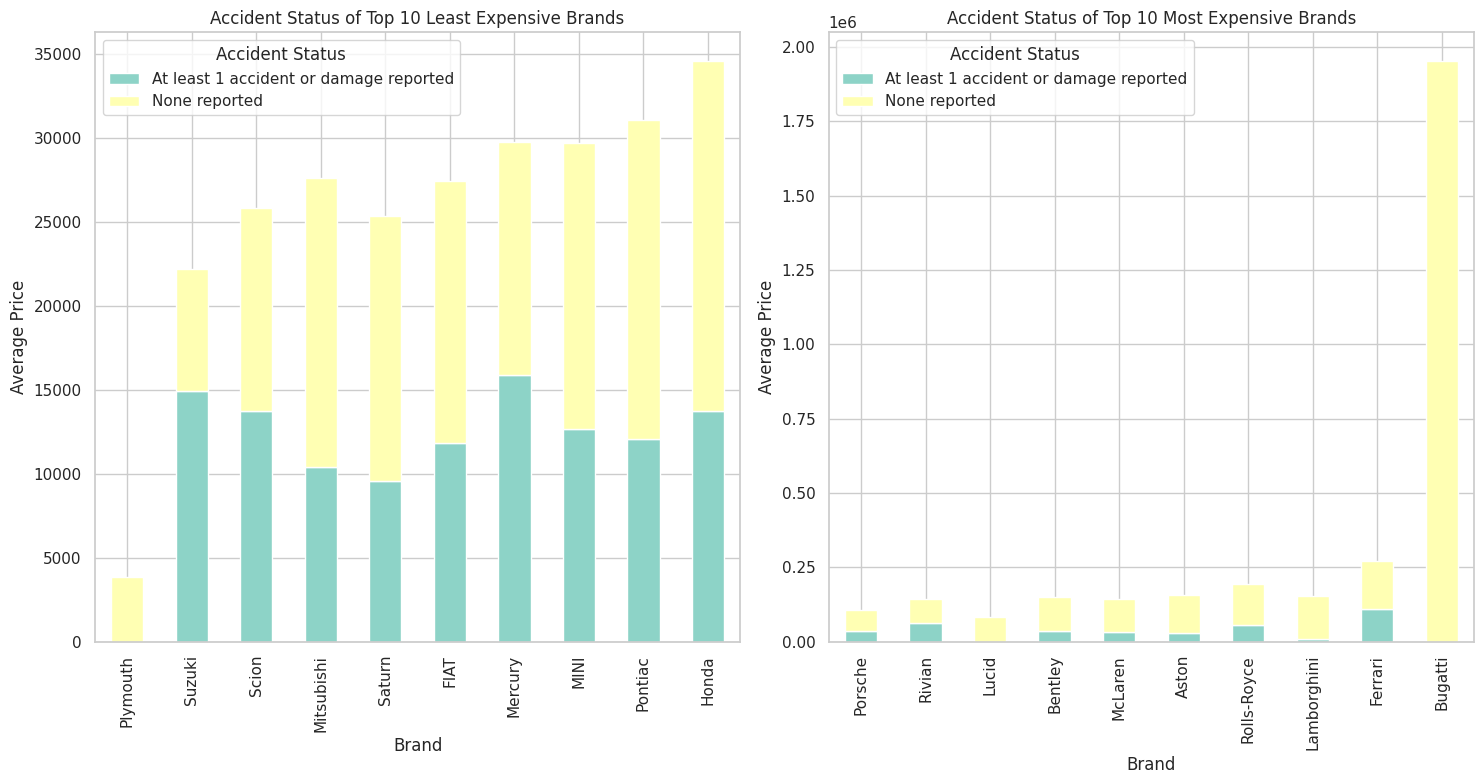

In [37]:
def plot_avg_price_brands_with_accident(df):
    # Calculate average price per brand and fuel type
    avg_price_per_brand_fuel = df.groupby(['brand', 'accident'])['price'].mean().unstack()
    avg_price_per_brand = df.groupby('brand')['price'].mean().sort_values()

    # Select top 10 brands with highest average price
    brands_high = avg_price_per_brand[-10:].index.tolist()
    top_10_brands_high = avg_price_per_brand_fuel.loc[brands_high]

    # Select top 10 brands with lowest average price
    brands_low = avg_price_per_brand[:10].index.tolist()
    top_10_brands_low = avg_price_per_brand_fuel.loc[brands_low]

    # Plotting horizontal stacked bar plots side by side
    fig, axes = plt.subplots(1, 2, figsize=(15, 8))
    
    # Top 10 lowest average price
    top_10_brands_low.plot(kind='bar', stacked=True, ax=axes[0], color=palette)
    axes[0].set_xlabel('Brand')
    axes[0].set_ylabel('Average Price')
    axes[0].set_title('Accident Status of Top 10 Least Expensive Brands')
    axes[0].legend(title='Accident Status', loc='upper left')  # Add legend
    
    # Top 10 highest average price
    top_10_brands_high.plot(kind='bar', stacked=True, ax=axes[1], color=palette)
    axes[1].set_xlabel('Brand')
    axes[1].set_ylabel('Average Price')
    axes[1].set_title('Accident Status of Top 10 Most Expensive Brands')
    axes[1].legend(title='Accident Status', loc='upper left')  # Add legend

    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame 'df'
plot_avg_price_brands_with_accident(df)

<div style="background-color: #CFA3EA; text-align: center; padding: 10px;">
    <h1>5. Analysis Results and Insights</h1>
</div>
<!-- # 5. Analysis Results and Insights -->


### 1. Recent Car Models
- **Insight**: While our dataset spans car model years from 1974 to 2024, the majority of cars were manufactured in the last 10-15 years. 🕰️

### 2. Mileage
- **Insight**: Most cars in our data have relatively low mileage—less than 200,000 miles.

### 3. Cylinder Counts
- **Insight**: The dataset predominantly features cars with six, eight, or four cylinders.

### 4. Fuel Types
- **Insight**: Gasoline is the reigning champion, powering most of the cars. A minority run on diesel, hybrid or E85 Flex fuel.

### 5. Transmission Types
- **Insight**: Automatic transmission rules the road, followed by dual-clutch and manual. CVT (continuously variable transmission) is less popular in the data. 🚦

### 6. Accident Status
- **Insight**: We've got a safety-conscious fleet! More cars in our dataset have no accident history than those with at least one reported accident. 🚫

### 7. Popular Car Brands by Count
- **Insight**: The stars of our dataset: BMW, Ford, Mercedes-Benz, Chevrolet, Audi, Porsche, Toyota, and Lexus. They're the most frequent here.

### 8. Aesthetics
- **Insight**: Exteriors favor classic colors—black, white, gray, silver, and blue. Interiors follow suit with black, beige, gray, brown, red, and white being predominant. 🎨

### 9. Correlation
- **Insight**: As expected, model year and mileage are negatively correlated. Newer models tend to have lower mileage. 📈🔗

### 10. Outliers
- **Insight**: Our price data has wild rides—from **2,000** beaters to **2.9 million** luxury cruisers. These outliers might raise eyebrows during model training so must be carefully handled.

### 11. Luxury vs. Affordability
- **Insight**: The high rollers? Bugatti, Ferrari, Lamborghini, Rolls-Royce, and Aston Martin. The budget-friendly crew? Plymouth, Suzuki, Scion, Mitsubishi, and Saturn. 🌟💰

### 12. Accident Incidence and Luxury
- **Insight**: The more expensive brands have less report of accident occurence compared to the more affordable ones. Luxury brands seem to steer clear of accidents, while the bargain-bin brands occasionally bump fenders. Safety meets status!


If you are still here, I hope you had as much fun reading this as i did making it. If you have any question or suggestion, please leave a comment.
Thank you for reading my analysis! 🚀👍

## <span style="color:blue;">If you found this useful, please kindly Upvote my kernel.</span>

<div style="text-align: center;">
    <img src="https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExZmw4Zm16anQycjMzbmVnbnBwc3Z6MHhldnk1OGJ0MjBzc2l5aGhldCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/2lVs0Mlb8D6kYsMWi5/giphy.gif" width="500">
</div>